In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
dataset = pd.read_csv("ipl_data.csv")
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
dataset.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [4]:
df = dataset.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [5]:
X = df.drop(['total'], axis =1)
y = df['total']

In [6]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import keras
import tensorflow as tf

model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), 
	keras.layers.Dense(512, activation='relu'), 
	keras.layers.Dense(216, activation='relu'), 
	keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0) 
model.compile(optimizer='adam', loss=huber_loss) 


In [10]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 4s 3ms/step - loss: 32.8846 - val_loss: 22.2418
Epoch 2/50
832/832 [==============================] - 3s 3ms/step - loss: 22.3414 - val_loss: 22.0308
Epoch 3/50
832/832 [==============================] - 3s 4ms/step - loss: 22.3020 - val_loss: 21.9887
Epoch 4/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2604 - val_loss: 21.9789
Epoch 5/50
832/832 [==============================] - 3s 3ms/step - loss: 22.2017 - val_loss: 22.1394
Epoch 6/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1843 - val_loss: 21.9960
Epoch 7/50
832/832 [==============================] - 3s 3ms/step - loss: 22.2032 - val_loss: 22.0789
Epoch 8/50
832/832 [==============================] - 3s 3ms/step - loss: 22.1585 - val_loss: 22.0122
Epoch 9/50
832/832 [==============================] - 3s 3ms/step - loss: 22.1540 - val_loss: 21.8777
Epoch 10/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1422

<Axes: >

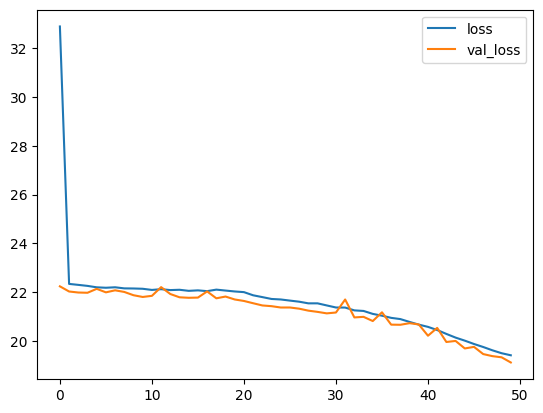

In [11]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [12]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 1s 1ms/step


19.614371388608284

In [13]:
model.save('model.h5')

c:\Users\Kshitij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
